In [10]:
%pylab inline
# Pandas is a nice utilitiy that enables some easy data manipulation, especially from a csv
import pandas as pd
# Numpy lets us work with arrays
import numpy as np
import random
# Sklearn provides various modules with a common API
from sklearn import svm, tree, neighbors, neural_network, discriminant_analysis, gaussian_process
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


Populating the interactive namespace of numpy and matplotlib

Going to test all classification comparison models. Link: https://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html#sphx-glr-auto-examples-classification-plot-classifier-comparison-py
- KNeighborsClassifier
- SVC
- GaussianProcessClassifier
- DecisionTreeClassifier
- RandomForestClassifier
- MLP Classifier
- AdaBoostClassifier
- GaussianNB
- QuadraticDiscriminant Analysis

In [6]:
import missingno
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter

In [29]:
from sklearn.linear_model import LogisticRegression, Perceptron, SGDClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.neural_network import MLPClassifier

# Model evaluation
from sklearn.model_selection import cross_val_score

# Hyperparameter tuning
from sklearn.model_selection import GridSearchCV

# Remove warnings
import warnings
warnings.filterwarnings('ignore')

In [11]:
# Read in our csv files downloaded from Kaggle
train_data = pd.read_csv('Dataset/train.csv')
test_data = pd.read_csv('Dataset/test.csv')

In [47]:
train_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,,
1,0,3,0,22.0,1,0,7.2500,2
2,1,1,1,38.0,1,0,71.2833,0
3,1,3,1,26.0,0,0,7.9250,2
4,1,1,1,35.0,1,0,53.1000,2
5,0,3,0,35.0,0,0,8.0500,2


In [45]:
train_data.columns[train_data.isna().any()].tolist()

[]

In [50]:
random.seed(100)
np.random.seed(100)

#train_data.drop(columns=['Name', 'Ticket', 'Cabin'], inplace=True)
#train_data.set_index(keys=['PassengerId'], drop=True, inplace=True)

#test_data.drop(columns=['Name', 'Ticket', 'Cabin'], inplace=True)
#test_data.set_index(keys=['PassengerId'], drop=True, inplace=True)

train_nan_map = {'Age': train_data['Age'].mean(), 'Fare': train_data['Fare'].mean(), 'Embarked': train_data['Embarked'].mode()[0]}
test_nan_map = {'Age': test_data['Age'].mean(), 'Fare': test_data['Fare'].mean(), 'Embarked': test_data['Embarked'].mode()[0]}

train_data.fillna(value=train_nan_map, inplace=True)
test_data.fillna(value=test_nan_map, inplace=True)

columns_map = {'Embarked': {'C': 0, 'Q': 1, 'S': 2}, 'Sex': {'male': 0, 'female': 1}}
train_data.replace(columns_map, inplace=True)
test_data.replace(columns_map, inplace=True)

X_train = train_data.loc[:, train_data.columns != 'Survived']
y_train = train_data.loc[:, 'Survived']

X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.2, random_state=10)

In [18]:
print(X_train.head())
print(y_train.head())
print(test_data.head())
print(f"Test Mean: {y_test.mean()}")
print(f"Train Mean: {y_train.mean()}")

             Pclass  Sex        Age  SibSp  Parch    Fare  Embarked
PassengerId                                                        
464               2    0  48.000000      0      0  13.000         2
160               3    0  29.699118      8      2  69.550         2
48                3    1  29.699118      0      0   7.750         1
403               3    1  21.000000      1      0   9.825         2
619               2    1   4.000000      2      1  39.000         2
PassengerId
464    0
160    0
48     1
403    0
619    1
Name: Survived, dtype: int64
             Pclass  Sex   Age  SibSp  Parch     Fare  Embarked
PassengerId                                                    
892               3    0  34.5      0      0   7.8292         1
893               3    1  47.0      1      0   7.0000         2
894               2    0  62.0      0      0   9.6875         1
895               3    0  27.0      0      0   8.6625         2
896               3    1  22.0      1      1  12.2875 

In [22]:
train_data.columns[train_data.isna().any()].tolist()
train_data[train_data['Embarked'].isna() == True]
#train_data['Embarked']
#test_data.columns[test_data.isna().any()].tolist()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,,


Testing KNeighborsClassifier

In [75]:
random.seed(100)
np.random.seed(100)

knn_clf = neighbors.KNeighborsClassifier()
knn_clf.fit(X_train.values, y_train.values)
print(knn_clf.score(X_test.values, y_test.values))
#y_pred = svm_clf.predict(X_test.values)
#y_truth = y_test.values

0.7094972067039106


Testing Linear SVC

In [76]:
random.seed(100)
np.random.seed(100)

svm_clf = svm.SVC(kernel='linear')
svm_clf.fit(X_train.values, y_train.values)
print(svm_clf.score(X_test.values, y_test.values))
#y_pred = svm_clf.predict(X_test.values)
#y_truth = y_test.values

0.8156424581005587


Testing Gaussian Process Classifier (RBF)

In [77]:
random.seed(100)
np.random.seed(100)

gpc_clf = GaussianProcessClassifier(kernel = 1.0 * RBF(1.0), random_state=0)
gpc_clf.fit(X_train.values, y_train.values)
print(gpc_clf.score(X_test.values, y_test.values))
#y_pred = svm_clf.predict(X_test.values)
#y_truth = y_test.values

0.8044692737430168


Testing DecisionTreeClassifier

In [78]:
random.seed(100)
np.random.seed(100)

tree_clf = tree.DecisionTreeClassifier()
tree_clf.fit(X_train.values, y_train.values)
print(tree_clf.score(X_test.values, y_test.values))
#y_pred = svm_clf.predict(X_test.values)
#y_truth = y_test.values

0.776536312849162


In [ ]:
Testing RandomForestClassifier

In [79]:
random.seed(100)
np.random.seed(100)

ranforest_clf = RandomForestClassifier()
ranforest_clf.fit(X_train.values, y_train.values)
print(ranforest_clf.score(X_test.values, y_test.values))
#y_pred = svm_clf.predict(X_test.values)
#y_truth = y_test.values

0.8212290502793296


Testing AdaBoost Classifier

In [80]:
random.seed(100)
np.random.seed(100)

AB_clf = AdaBoostClassifier()
AB_clf.fit(X_train.values, y_train.values)
print(AB_clf.score(X_test.values, y_test.values))
#y_pred = svm_clf.predict(X_test.values)
#y_truth = y_test.values

0.8379888268156425


Testing Gaussian NB

In [81]:
random.seed(100)
np.random.seed(100)

GaussNB_clf = GaussianNB()
GaussNB_clf.fit(X_train.values, y_train.values)
print(GaussNB_clf.score(X_test.values, y_test.values))
#y_pred = svm_clf.predict(X_test.values)
#y_truth = y_test.values

0.7988826815642458


Testing Quadratic Discriminant Analysis

In [82]:
random.seed(100)
np.random.seed(100)

QDA_clf = GaussianNB()
QDA_clf.fit(X_train.values, y_train.values)
print(QDA_clf.score(X_test.values, y_test.values))
#y_pred = svm_clf.predict(X_test.values)
#y_truth = y_test.values

0.7988826815642458


Testing MLP Classifier

In [84]:
random.seed(100)
np.random.seed(100)

NN_clf = neural_network.MLPClassifier()
NN_clf.fit(X_train.values, y_train.values)
print(NN_clf.score(X_test.values, y_test.values))
y_pred = svm_clf.predict(X_test.values)
y_truth = y_test.values

0.8379888268156425


In [85]:
tn, fp, fn, tp = confusion_matrix(y_truth, y_pred).ravel()
print("Confusion Matrix")
print(confusion_matrix(y_truth, y_pred, labels=[0, 1]))
print("")
print("True Negatives", tn)
print("False Positives", fp)
print("False Negatives", fn)
print("True Positives", tp)

Confusion Matrix
[[104  13]
 [ 20  42]]

True Negatives 104
False Positives 13
False Negatives 20
True Positives 42


Confusion matrix, without normalization
[[104  13]
 [ 20  42]]


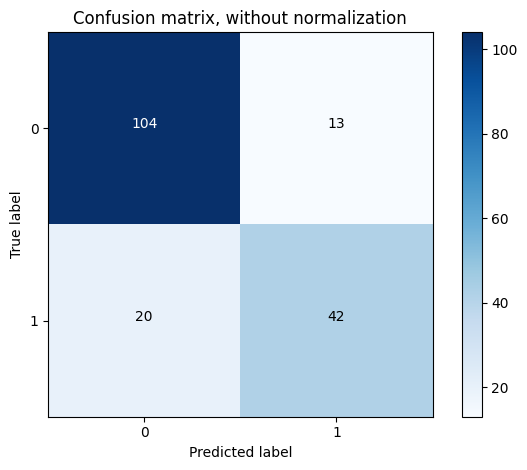

In [87]:
import itertools
import matplotlib.pyplot as plt

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()


# Compute confusion matrix
cnf_matrix = confusion_matrix(y_truth, y_pred)
class_names=['0', '1']
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization')

plt.show()

In [93]:
predictions = NN_clf.predict(test_data.values)

In [94]:
type(predictions)

numpy.ndarray

In [95]:
pred_df = pd.DataFrame(predictions, index=test_data.index, columns=['Survived'])
type(pred_df)

pandas.core.frame.DataFrame

In [96]:
pred_df.to_csv('predictions.csv', header=True, sep=',')